In [84]:
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
with open('df_by_usr.json', 'r', encoding='UTF-8') as f:
    data = f.readlines()
    df_by_usr_data = list(map(json.loads, data))
    
df_by_usr = pd.DataFrame(df_by_usr_data)

In [6]:
df_by_usr.tail(5)

,avg_star_delta,reviewer_label,text_agg,user_id
35046,0.318182,med,I can't believe I forgot to review this place ...,zzK05ZbEva9FGAjEFWlGFg
35047,-0.093750,med,Brio is very good especially for the price. Th...,zzMJLd3cWBM6HT8eMbOGbA
35048,0.166667,med,"Mhmm, I can see why this place has as many sta...",zzUlFuJ5HFNEm15o9YC9Qg
35049,0.791667,easy,"Excellent service, sushi is great , great frie...",zzYF64kl9es4c16fv68OIQ
35050,-0.083333,med,This is our favorite place for pizza in Arizon...,zzitZPIJBmyxt8DefrJygg


In [26]:
with open('/Users/7of9/Documents/Machine_Learning/yelp-dataset-data/yelp_academic_dataset_review.json', 'r', encoding='UTF-8') as f:
    data = f.readlines()
    df_rev = list(map(json.loads, data))
    
df_rev = pd.DataFrame(df_rev)

In [27]:
df_rev.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [37]:
df_by_usr[['user_id', 'avg_star_delta']].head()

,user_id,avg_star_delta
0,--3WaS23LcIXtxyFULJHTA,-0.318182
1,--4rAAfZnEIAKJE80aIiYg,-0.947368
2,--CIuK7sUpaNzalLAlHJKA,0.333333
3,--HCoE1ghaAlcaAfshICgw,0.900000
4,--NIc98RMssgy0mSZL3vpA,-0.166667


In [38]:
delta_reviews2 = df_by_usr[['user_id', 'avg_star_delta']].merge(df_rev, how='inner', left_on='user_id', right_on='user_id')

In [39]:
delta_reviews2.head()

,user_id,avg_star_delta,business_id,cool,date,funny,review_id,stars,text,useful
0,--3WaS23LcIXtxyFULJHTA,-0.318182,zaLFPpm-t89qSDOaFVgwDQ,0,2014-09-09,0,Q18Y1JDRiUKUp2TvArnEUQ,4,"This is not a five star restaurant, it's a bur...",0
1,--3WaS23LcIXtxyFULJHTA,-0.318182,bmQxZkn4hA8tEL-Z33pZKw,1,2012-12-13,1,PuAZgFi86FaWMaymty9Xtw,5,"Baratin made my day, truly a pleasure.\n\nI st...",1
2,--3WaS23LcIXtxyFULJHTA,-0.318182,8USUyIeN39rurnqCn5cA0w,0,2016-09-06,1,hTATQZ1gRhxpZ2W5WpvpaA,3,I'm not sure where all the rave reviews are co...,4
3,--3WaS23LcIXtxyFULJHTA,-0.318182,DkYS3arLOhA8si5uUEmHOw,0,2016-09-06,0,wvWNYhH6CulQXP-dHUrsDA,3,"Ummm, due to the star ratings on Yelp we made ...",0
4,--3WaS23LcIXtxyFULJHTA,-0.318182,bwZqlLj8oYaML3ndlybeDg,1,2018-04-27,1,tSoHkjN5turLxs0Qch12Jg,4,If you can find it it's worth stopping in to e...,1


Text(0, 0.5, 'Length of Total Reviews')

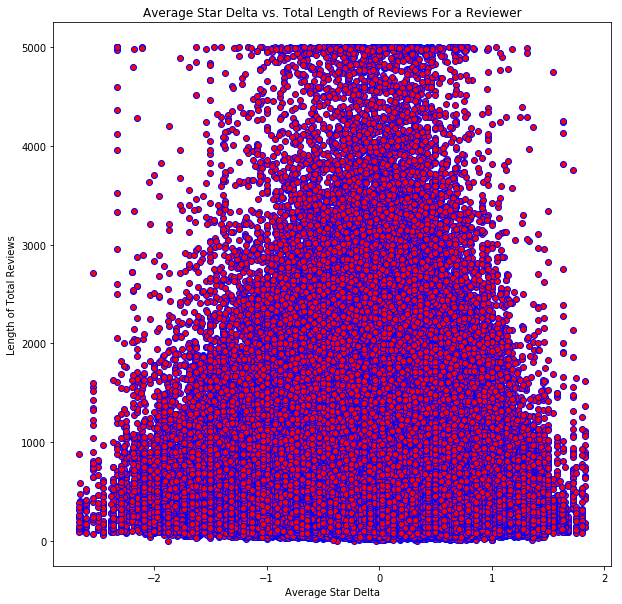

In [87]:
# star_delta and review length scatter plot
x = delta_reviews2['avg_star_delta']
y = []
for text in delta_reviews2['text']:
    y.append(len(text))
    
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax.set_title('Average Star Delta vs. Total Length of Reviews For a Reviewer')
ax.set_xlabel('Average Star Delta')
ax.set_ylabel('Length of Total Reviews')


In [44]:
delta_reviews2['length'] = y

In [45]:
delta_reviews2.describe()

,avg_star_delta,cool,funny,stars,useful,length
count,648101.000000,648101.000000,648101.000000,648101.000000,648101.000000,648101.000000
mean,0.024984,0.504969,0.440836,3.757532,1.236810,582.444526
std,0.543026,2.176026,2.095572,1.375465,3.635894,534.904397
min,-2.666667,0.000000,0.000000,1.000000,0.000000,1.000000
25%,-0.285714,0.000000,0.000000,3.000000,0.000000,240.000000
50%,0.066667,0.000000,0.000000,4.000000,0.000000,418.000000
75%,0.388889,0.000000,0.000000,5.000000,1.000000,736.000000
max,1.833333,311.000000,358.000000,5.000000,1234.000000,5000.000000


In [48]:
4 <= 6

True

In [62]:
std_len = 534.904397
mean_len = 582.444526

def len_label(row):
    if row['length'] <= (mean_len-std_len):
        return "-1 std or more"
    if row['length'] > (mean_len-std_len) and row['length'] <= mean_len:
        return "-1 and 0 std"    
    if (mean_len+std_len) >= row['length'] and row['length'] > mean_len: 
        return "0 and +1 std"
    if row['length'] > (mean_len+std_len):
        return "+1 std or more"

delta_reviews2['len_std'] = delta_reviews2.apply(lambda row: len_label(row), axis=1)

In [64]:
delta_reviews2.head()

,user_id,avg_star_delta,business_id,cool,date,funny,review_id,stars,text,useful,length,len_std
0,--3WaS23LcIXtxyFULJHTA,-0.318182,zaLFPpm-t89qSDOaFVgwDQ,0,2014-09-09,0,Q18Y1JDRiUKUp2TvArnEUQ,4,"This is not a five star restaurant, it's a bur...",0,846,0 and +1 std
1,--3WaS23LcIXtxyFULJHTA,-0.318182,bmQxZkn4hA8tEL-Z33pZKw,1,2012-12-13,1,PuAZgFi86FaWMaymty9Xtw,5,"Baratin made my day, truly a pleasure.\n\nI st...",1,726,0 and +1 std
2,--3WaS23LcIXtxyFULJHTA,-0.318182,8USUyIeN39rurnqCn5cA0w,0,2016-09-06,1,hTATQZ1gRhxpZ2W5WpvpaA,3,I'm not sure where all the rave reviews are co...,4,1009,0 and +1 std
3,--3WaS23LcIXtxyFULJHTA,-0.318182,DkYS3arLOhA8si5uUEmHOw,0,2016-09-06,0,wvWNYhH6CulQXP-dHUrsDA,3,"Ummm, due to the star ratings on Yelp we made ...",0,460,-1 and 0 std
4,--3WaS23LcIXtxyFULJHTA,-0.318182,bwZqlLj8oYaML3ndlybeDg,1,2018-04-27,1,tSoHkjN5turLxs0Qch12Jg,4,If you can find it it's worth stopping in to e...,1,301,-1 and 0 std


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Review Lengths')

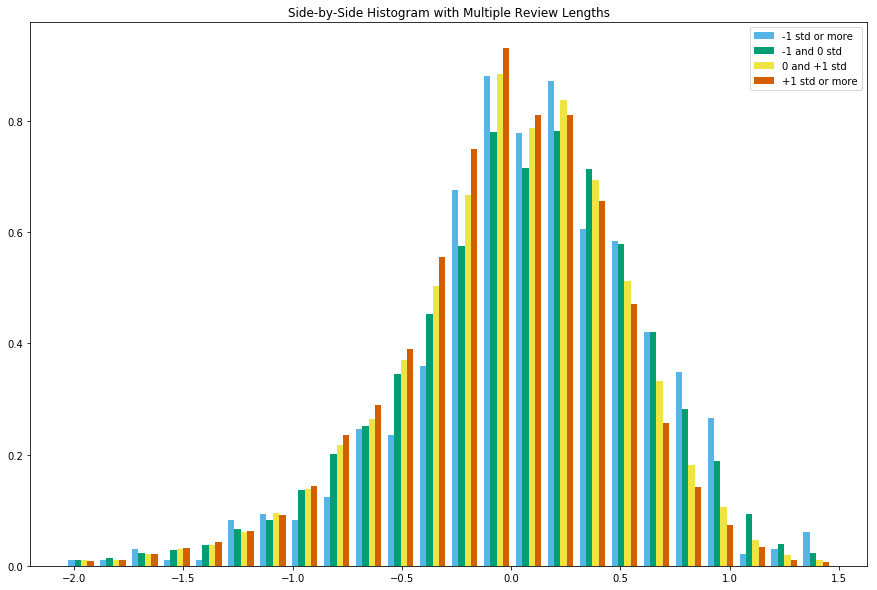

In [72]:
# x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x1 = list(delta_reviews2[delta_reviews2['len_std'] == "-1 std or more"]['avg_star_delta'])
x2 = list(delta_reviews2[delta_reviews2['len_std'] == "-1 and 0 std"]['avg_star_delta'])
x3 = list(delta_reviews2[delta_reviews2['len_std'] == "0 and +1 std"]['avg_star_delta'])
x4 = list(delta_reviews2[delta_reviews2['len_std'] == "+1 std or more"]['avg_star_delta'])

colors = ['#56B4E9', '#009E73', '#F0E442', '#D55E00']
names = ["-1 std or more", "-1 and 0 std", "0 and +1 std", "+1 std or more"]
plt.figure(figsize=(15,10))
plt.hist([x1, x2, x3, x4], bins ='auto', density=True,
         color = colors, label=names)
plt.legend()
#plt.ylabel('Standord Deviations of Review Length')
#plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Review Lengths')

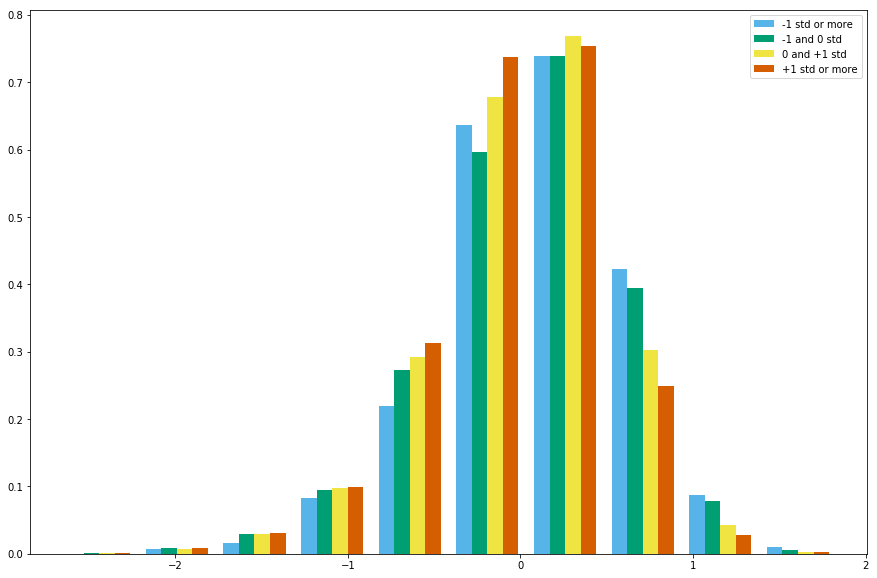

In [90]:
x1 = list(delta_reviews2[delta_reviews2['len_std'] == "-1 std or more"]['avg_star_delta'])
x2 = list(delta_reviews2[delta_reviews2['len_std'] == "-1 and 0 std"]['avg_star_delta'])
x3 = list(delta_reviews2[delta_reviews2['len_std'] == "0 and +1 std"]['avg_star_delta'])
x4 = list(delta_reviews2[delta_reviews2['len_std'] == "+1 std or more"]['avg_star_delta'])

colors = ['#56B4E9', '#009E73', '#F0E442', '#D55E00']
names = ["-1 std or more", "-1 and 0 std", "0 and +1 std", "+1 std or more"]
plt.figure(figsize=(15,10))
n, bins, patches = plt.hist( [x1,x2, x3, x4], 10, histtype='bar', density=True, color = colors, label=names) 
plt.legend()
plt.show()

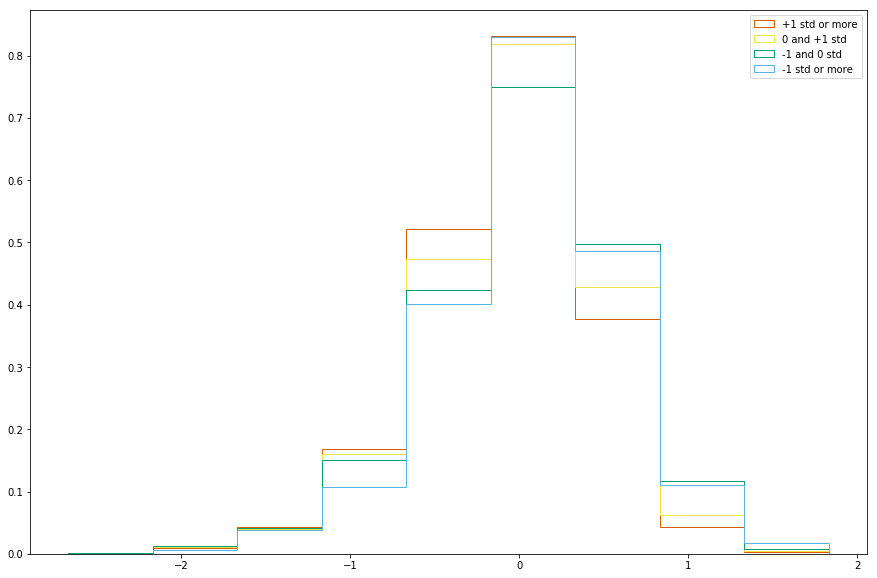

In [92]:
x1 = list(delta_reviews2[delta_reviews2['len_std'] == "-1 std or more"]['avg_star_delta'])
x2 = list(delta_reviews2[delta_reviews2['len_std'] == "-1 and 0 std"]['avg_star_delta'])
x3 = list(delta_reviews2[delta_reviews2['len_std'] == "0 and +1 std"]['avg_star_delta'])
x4 = list(delta_reviews2[delta_reviews2['len_std'] == "+1 std or more"]['avg_star_delta'])

colors = ['#56B4E9', '#009E73', '#F0E442', '#D55E00']
names = ["-1 std or more", "-1 and 0 std", "0 and +1 std", "+1 std or more"]
plt.figure(figsize=(15,10))
n, bins, patches = plt.hist( [x1,x2, x3, x4], bins=9, histtype='step', density=True, color = colors, label=names) #weights=[w0, w1, w2],
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bd01ac8>,
      dtype=object)

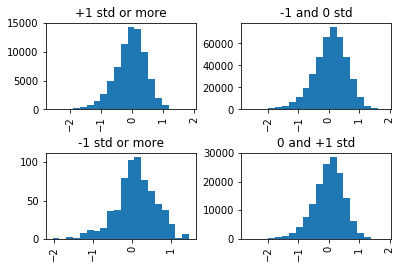

In [83]:
delta_reviews2['avg_star_delta'].hist(by=delta_reviews2['len_std'], bins=20)

In [11]:
with open('/Users/7of9/Documents/Machine_Learning/yelp-dataset-data/yelp_academic_dataset_business.json', 'r', encoding='UTF-8') as f:
    data = f.readlines()
    df_biz = list(map(json.loads, data))
    
df_biz = pd.DataFrame(df_biz)

In [12]:
df_biz.tail(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
188588,"8000 McKnight Rd, Ste 570","{'AcceptsInsurance': 'False', 'BusinessAccepts...",sMQAZ3DkfrURFoJAyOhjEw,"Skin Care, Beauty & Spas, Day Spas, Massage",Pittsburgh,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",0,40.551152,-80.021213,Ross Massage,,15237,9,2.5,PA
188589,3341 Babcock Blvd,None,6hvuCibNS4uECetHb9MCQQ,"Fashion, Women's Clothing, Accessories, Bridal...",Pittsburgh,None,1,40.534242,-80.019556,Four Seasons Boutique,,15237,5,2.0,PA
188590,5825 Thunder Rd,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",KleCXFYOmdACcQUvf6_XEg,"Mobile Phones, Shopping, Department Stores, Fo...",Concord,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,35.378669,-80.724733,Walmart Supercenter,,28027,26,3.0,NC
188591,7601 Scott Padgett Pkwy,"{'BusinessAcceptsCreditCards': 'True', 'DogsAl...",3_fIsSxN2RBovQ_6EFtLzA,"Event Planning & Services, Hotels & Travel, Ho...",Concord,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,35.364366,-80.703454,Residence Inn Charlotte Concord,,28027,19,4.0,NC
188592,"3900 Paradise Rd, Ste R","{'BikeParking': 'True', 'BusinessAcceptsCredit...",NkOvIueadjFUxeCyq_uQEw,"Makeup Artists, Men's Clothing, Swimwear, Shop...",Las Vegas,"{'Tuesday': '11:0-19:0', 'Wednesday': '11:0-19...",1,36.118697,-115.154269,Tito Jimy Salon and Boutique,Eastside,89169,8,4.0,NV


Text(0, 0.5, 'Number of Resturants')

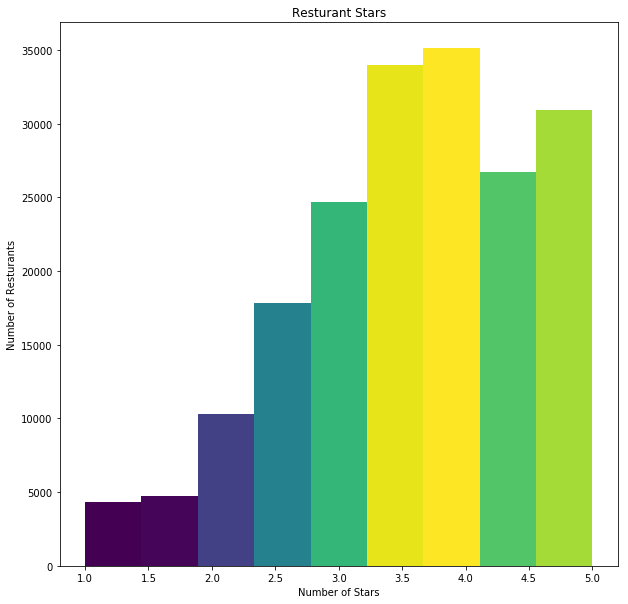

In [25]:
# Distribution of Resturant Stars
from matplotlib import colors  #.Normalize
x2 = df_biz['stars']

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(x2, bins=9)
N, bins, patches = ax.hist(x2, bins=9)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
ax.hist(x2, bins=9, density=True)
ax.set_title('Resturant Stars')
ax.set_xlabel('Number of Stars')
ax.set_ylabel('Number of Resturants')
